In [1]:
# Mounting Google Drive
from google.colab import drive
from os.path import join
ROOT = '/content/drive'
print(ROOT)
drive.mount(ROOT)

/content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%pwd

'/content'

In [3]:
%cd /content/drive/My\ Drive/Colab Notebooks/ProjectData

/content/drive/My Drive/Colab Notebooks/ProjectData


## Importing the dataset and necessary libraries

In [4]:
from imutils import paths
import numpy as np
import argparse
import imutils
import pickle
import cv2
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
%matplotlib inline

In [5]:
Dataset_path = "FaceRecognition/dataset"
face_detection_path= "FaceRecognition/face_detection_model/res10_300x300_ssd_iter_140000.caffemodel"
proto_path = "FaceRecognition/face_detection_model/deploy.prototxt"
embedding_gen_path = "FaceRecognition/openface_nn4.small2.v1.t7"
output_path = "FaceRecognition/output"

In [6]:
print("Loading face detector.....")
detector = cv2.dnn.readNetFromCaffe(proto_path, face_detection_path)

Loading face detector.....


In [7]:
print("Loading face embedder....")
embedder = cv2.dnn.readNetFromTorch(embedding_gen_path);

Loading face embedder....


In [8]:
imagepath = list(paths.list_images(Dataset_path))


In [9]:
imagepath

['FaceRecognition/dataset/arpan/IMG-20180811-WA0022.jpg',
 'FaceRecognition/dataset/arpan/IMG-20200520-WA0004.jpg',
 'FaceRecognition/dataset/arpan/IMG-20200902-WA0007.jpg',
 'FaceRecognition/dataset/arpan/IMG-20180925-WA0019.jpg',
 'FaceRecognition/dataset/arpan/IMG-20180104-WA0004.jpg',
 'FaceRecognition/dataset/arpan/IMG-20180114-WA0040.jpg',
 'FaceRecognition/dataset/arpan/IMG-20200307-WA0016.jpg',
 'FaceRecognition/dataset/arpan/IMG-20200902-WA0015.jpg',
 'FaceRecognition/dataset/arpan/arpan1.jpg',
 'FaceRecognition/dataset/arpan/IMG_20190210_155413235.jpg',
 'FaceRecognition/dataset/arpan/IMG-20180208-WA0000.jpg',
 'FaceRecognition/dataset/arpan/IMG_20181224_121707408_HDR.jpg',
 'FaceRecognition/dataset/remon/IMG-20191028-WA0035.jpg',
 'FaceRecognition/dataset/remon/IMG-20191228-WA0018.jpg',
 'FaceRecognition/dataset/remon/IMG-20200102-WA0005.jpg',
 'FaceRecognition/dataset/remon/IMG-20190803-WA0002.jpg',
 'FaceRecognition/dataset/remon/IMG-20181027-WA0016.jpg',
 'FaceRecognition

Processing image  1 / 47
[[[47 48 46]
  [61 62 60]
  [76 77 75]
  ...
  [13 14 12]
  [13 14 12]
  [13 14 12]]

 [[43 44 42]
  [57 58 56]
  [71 72 70]
  ...
  [14 15 13]
  [14 15 13]
  [13 14 12]]

 [[36 37 35]
  [50 51 49]
  [65 66 64]
  ...
  [15 16 14]
  [15 16 14]
  [15 16 14]]

 ...

 [[82 83 81]
  [82 83 81]
  [83 84 82]
  ...
  [61 62 60]
  [36 37 35]
  [17 18 16]]

 [[82 83 81]
  [82 83 81]
  [82 83 81]
  ...
  [47 48 46]
  [41 42 40]
  [28 29 27]]

 [[81 82 80]
  [82 83 81]
  [82 83 81]
  ...
  [62 63 61]
  [57 58 56]
  [34 35 33]]]


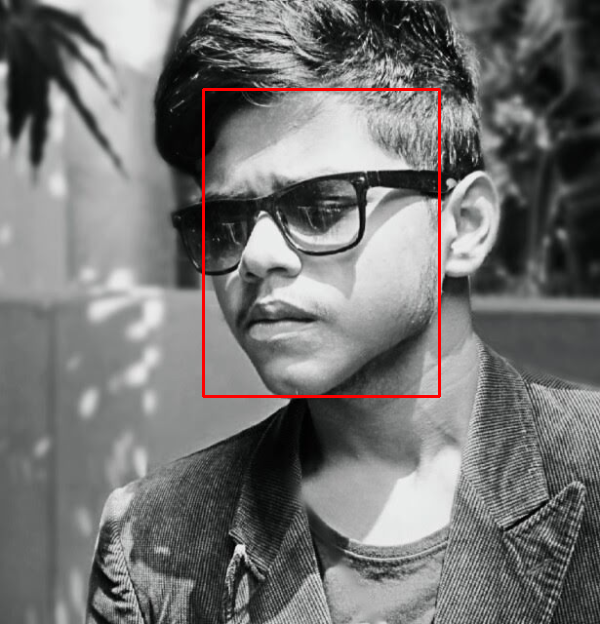

Processing image  2 / 47
[[[234 209 153]
  [237 212 156]
  [243 213 158]
  ...
  [129 159 160]
  [136 166 167]
  [139 170 173]]

 [[234 209 153]
  [241 214 158]
  [246 216 161]
  ...
  [128 158 159]
  [133 163 164]
  [136 167 170]]

 [[237 210 154]
  [243 216 160]
  [251 221 166]
  ...
  [127 157 158]
  [130 160 161]
  [131 162 165]]

 ...

 [[128 128 110]
  [127 127 109]
  [126 126 108]
  ...
  [158 209 235]
  [158 209 235]
  [158 209 235]]

 [[131 131 113]
  [130 130 112]
  [129 129 111]
  ...
  [158 209 235]
  [157 208 234]
  [157 208 234]]

 [[134 134 116]
  [133 133 115]
  [132 132 114]
  ...
  [157 208 234]
  [157 208 234]
  [156 207 233]]]


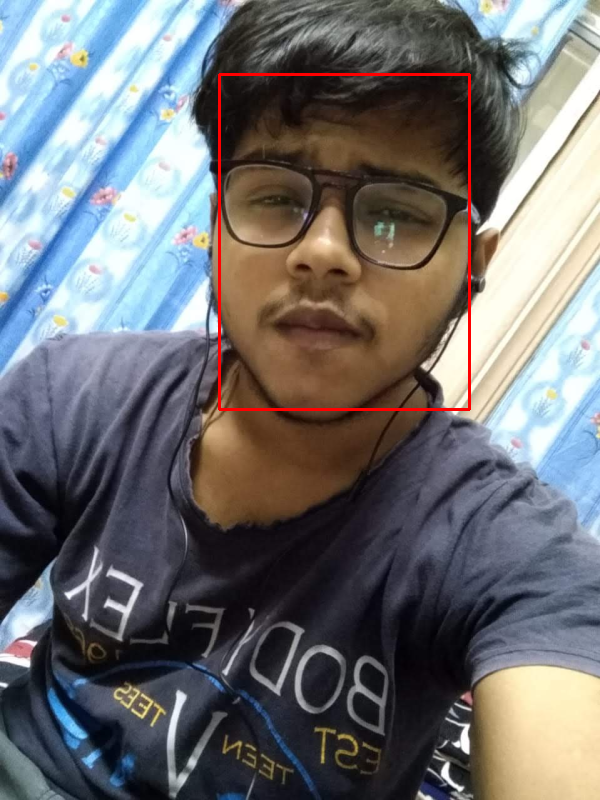

Processing image  3 / 47
[[[ 44  44  14]
  [ 44  44  14]
  [ 44  44  14]
  ...
  [ 29  28  38]
  [ 28  29  39]
  [ 28  30  38]]

 [[ 44  44  14]
  [ 44  44  14]
  [ 44  44  14]
  ...
  [ 29  28  38]
  [ 28  29  39]
  [ 28  30  38]]

 [[ 44  44  14]
  [ 44  44  14]
  [ 44  44  14]
  ...
  [ 29  28  38]
  [ 28  29  39]
  [ 28  30  38]]

 ...

 [[113 132 167]
  [114 130 166]
  [109 120 158]
  ...
  [168 149 128]
  [169 150 129]
  [175 156 135]]

 [[111 130 165]
  [113 129 165]
  [108 119 157]
  ...
  [174 155 134]
  [173 154 133]
  [175 156 135]]

 [[101 120 155]
  [105 121 157]
  [102 113 151]
  ...
  [182 163 142]
  [180 161 140]
  [181 162 141]]]


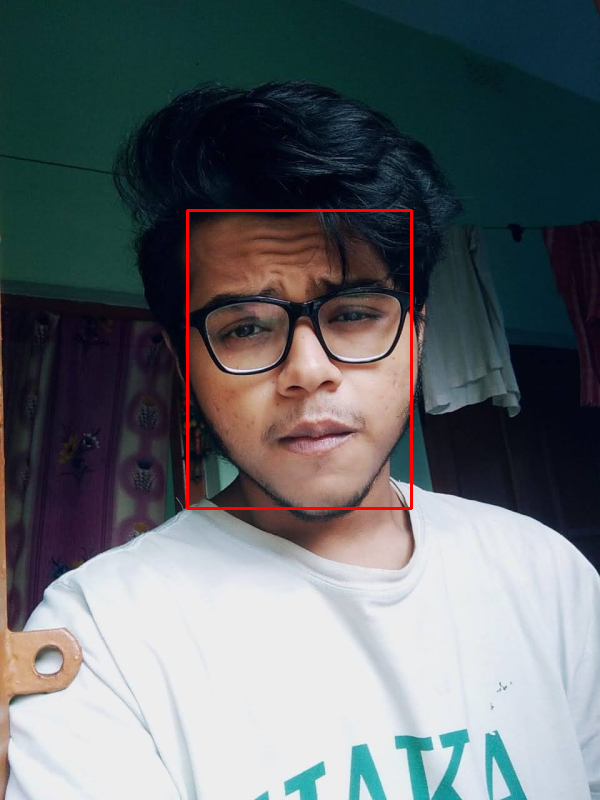

Processing image  4 / 47
[[[87 82 51]
  [88 83 52]
  [89 84 53]
  ...
  [58 54 36]
  [57 53 35]
  [57 53 35]]

 [[79 74 43]
  [81 76 45]
  [83 78 47]
  ...
  [58 54 36]
  [58 54 36]
  [57 53 35]]

 [[73 68 37]
  [77 72 41]
  [80 75 44]
  ...
  [58 54 36]
  [58 54 36]
  [58 54 36]]

 ...

 [[63 63 45]
  [67 67 49]
  [73 73 55]
  ...
  [45 44 46]
  [44 43 45]
  [44 43 45]]

 [[67 69 50]
  [68 70 51]
  [70 72 53]
  ...
  [49 46 48]
  [47 44 46]
  [47 44 46]]

 [[74 76 57]
  [72 74 55]
  [69 71 52]
  ...
  [50 47 49]
  [48 45 47]
  [47 44 46]]]


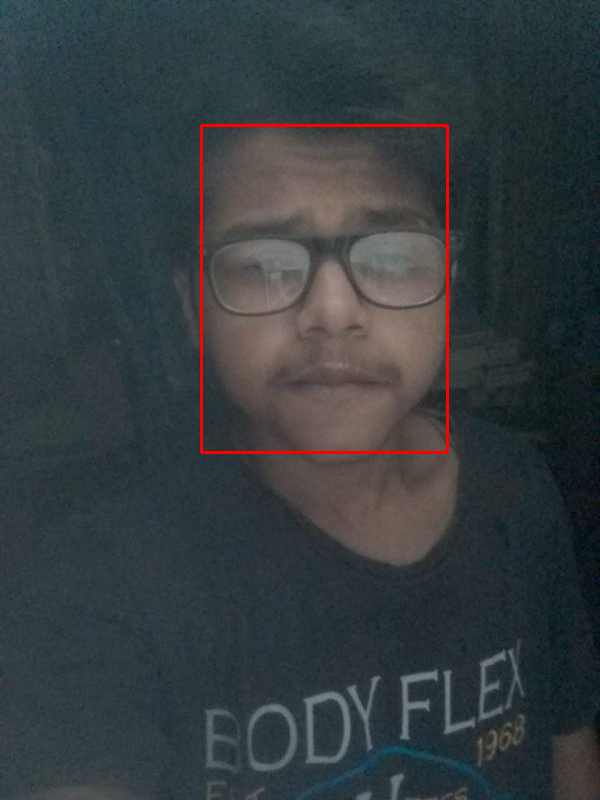

Processing image  5 / 47
[[[143 187 194]
  [127 171 178]
  [139 183 190]
  ...
  [ 42  79  93]
  [ 27  64  78]
  [ 77 114 128]]

 [[115 159 166]
  [139 183 190]
  [135 179 186]
  ...
  [ 50  87 101]
  [ 39  76  90]
  [ 83 120 134]]

 [[ 97 141 148]
  [104 148 155]
  [ 99 143 150]
  ...
  [ 52  89 103]
  [ 52  89 103]
  [ 85 122 136]]

 ...

 [[145 155 143]
  [158 168 156]
  [165 175 163]
  ...
  [ 23  25  49]
  [ 14  16  40]
  [ 12  14  38]]

 [[161 171 159]
  [151 161 149]
  [158 168 156]
  ...
  [ 17  19  43]
  [ 11  13  37]
  [ 18  20  44]]

 [[177 187 175]
  [153 163 151]
  [151 161 149]
  ...
  [ 11  13  37]
  [  7   9  33]
  [ 20  22  46]]]


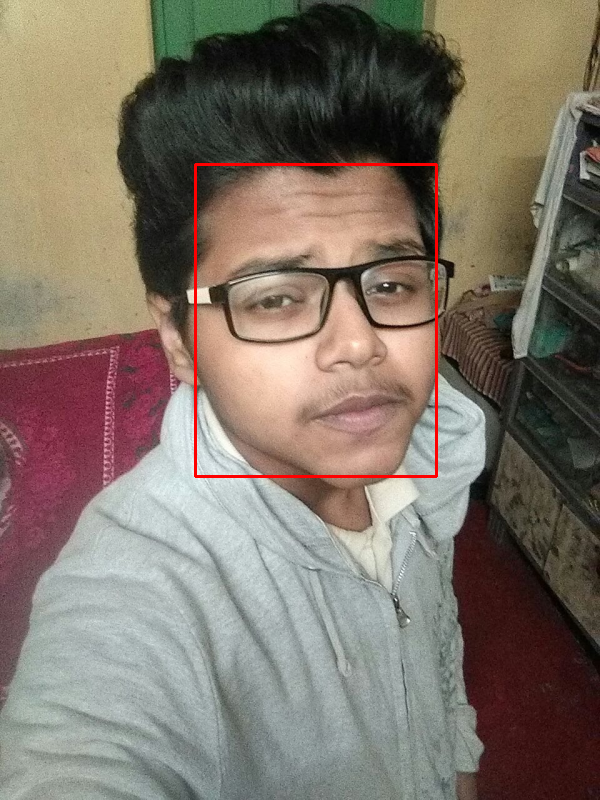

Processing image  6 / 47
[[[ 23  23  23]
  [ 22  22  22]
  [ 20  20  20]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]

 [[ 27  27  27]
  [ 26  26  26]
  [ 23  23  23]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]

 [[ 24  24  24]
  [ 24  24  24]
  [ 26  26  26]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]

 ...

 [[ 14  14  14]
  [ 10  10  10]
  [ 10  10  10]
  ...
  [ 71  71  71]
  [ 64  64  64]
  [ 64  64  64]]

 [[  9   9   9]
  [  7   7   7]
  [  7   7   7]
  ...
  [ 67  67  67]
  [ 62  62  62]
  [ 61  61  61]]

 [[ 14  14  14]
  [ 13  13  13]
  [  8   8   8]
  ...
  [ 62  62  62]
  [ 58  58  58]
  [ 57  57  57]]]


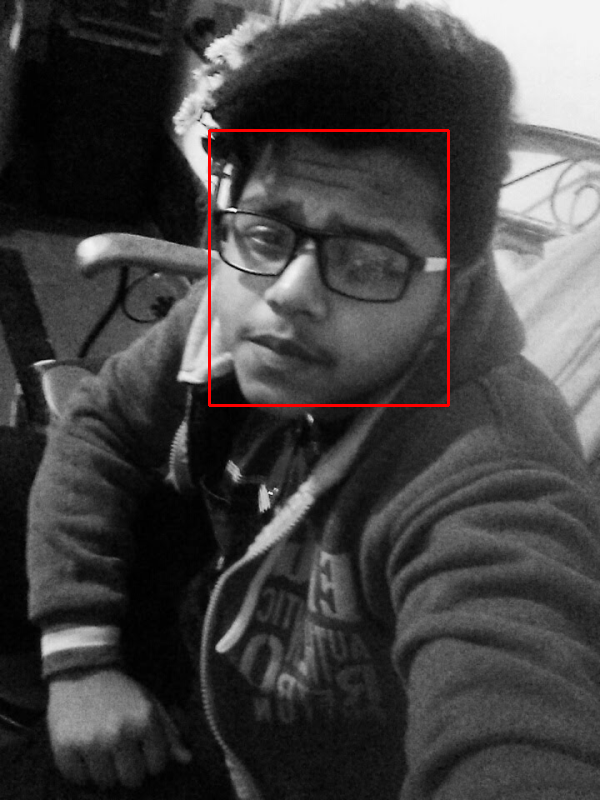

Processing image  7 / 47
[[[143 175 228]
  [143 175 228]
  [143 175 228]
  ...
  [102 109 118]
  [105 111 118]
  [106 112 119]]

 [[143 175 228]
  [143 175 228]
  [143 175 228]
  ...
  [102 109 118]
  [105 111 118]
  [106 112 119]]

 [[144 176 229]
  [144 176 229]
  [144 176 229]
  ...
  [102 109 118]
  [105 111 118]
  [106 112 119]]

 ...

 [[ 34  47  85]
  [ 34  47  85]
  [ 34  47  85]
  ...
  [103 143 202]
  [102 142 201]
  [102 142 201]]

 [[ 34  47  85]
  [ 34  47  85]
  [ 34  47  85]
  ...
  [102 142 201]
  [103 143 202]
  [103 143 202]]

 [[ 34  47  85]
  [ 34  47  85]
  [ 34  47  85]
  ...
  [102 142 201]
  [103 143 202]
  [104 144 203]]]


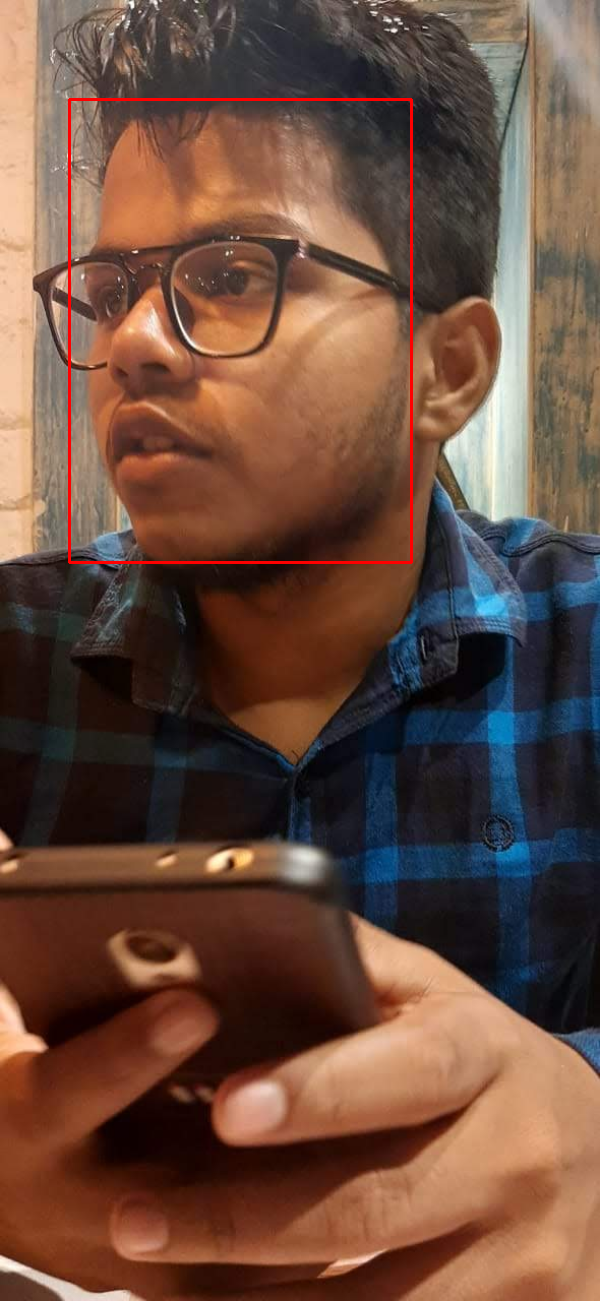

Processing image  8 / 47
[[[ 32  16  17]
  [ 31  15  16]
  [ 29  13  14]
  ...
  [ 48  46  35]
  [ 46  44  33]
  [ 45  43  32]]

 [[ 31  15  16]
  [ 30  14  15]
  [ 29  13  14]
  ...
  [ 47  45  34]
  [ 45  43  32]
  [ 43  41  30]]

 [[ 30  14  15]
  [ 30  14  15]
  [ 29  13  14]
  ...
  [ 44  42  31]
  [ 41  40  26]
  [ 39  38  24]]

 ...

 [[ 56  63  66]
  [ 55  62  65]
  [ 58  65  68]
  ...
  [230 221 194]
  [230 221 194]
  [230 221 194]]

 [[ 61  68  71]
  [ 57  64  67]
  [ 57  64  67]
  ...
  [230 221 194]
  [230 221 194]
  [230 221 194]]

 [[ 66  73  76]
  [ 59  66  69]
  [ 57  64  67]
  ...
  [230 221 194]
  [230 221 194]
  [231 222 195]]]


In [ ]:
knownEmbeddings = []
knownNames = []
total = 0
length=len(imagepath)
for (i, imageP) in enumerate(imagepath):
  print("Processing image ",int(i+1),"/",length-1)
  name = imageP.split(os.path.sep)[-2]
  #print(name,imageP)

  image =  cv2.imread(imageP)
  print(image)
  image = imutils.resize(image, width=600)
  (h,w) = image.shape[:2]
  '''if(i % 5 == 0):
    plt.imshow(image)
    plt.show()
  '''
  blob = cv2.dnn.blobFromImage(cv2.resize(image, (300,300)),1.0, (300,300),(104.0, 177.0, 123.0), swapRB= False, crop = False)
  detector.setInput(blob)
  detections = detector.forward()

  for i in range(0,detections.shape[2]):
    confidence = detections[0,0,i,2];

    if confidence < 0.5:
      continue

    box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
    (startX, startY, endX, endY) = box.astype("int")


    cv2.rectangle(image, (startX, startY), (endX, endY), (0,0,255), 2)

    #text = "Confidence: ",confidence
    #image = cv2.putText(image,text,(startX, startY), cv2.FONT_HERSHEY_SIMPLEX , 0.45, (0,0,255),2) 
    face = image[startY:endY, startX:endX]
    (fH, fW) = face.shape[:2]

    if fH < 20 or fW < 20:
      continue

    faceBlob = cv2.dnn.blobFromImage(face, 1/255, (96,96), (0,0,0), swapRB = True, crop= False)

    embedder.setInput(faceBlob)
    vec = embedder.forward()
    knownNames.append(name)
    knownEmbeddings.append(vec.flatten())

    total = total+ 1



  cv2_imshow(image)



In [ ]:
print("Serialising",total, "images and saving it into pickle files")
data = {"name":knownNames, "embedding":knownEmbeddings}
pickcle_path = output_path+"/data.pickle"
f = open(pickcle_path, "wb")
f.write(pickle.dumps(data))
f.close()

Serialising 48 images and saving it into pickle files


In [ ]:
image1 = cv2.imread("FaceRecognition/dataset/arpan/arpan1.jpg")
image1.shape

(3120, 4160, 3)

In [ ]:
detections[0,0,10]

array([0.        , 1.        , 0.08736235, 0.4320156 , 0.32942814,
       0.5610454 , 0.51926637], dtype=float32)

In [ ]:
knownNames

In [ ]:
!pwd

In [ ]:
%cd FaceRecognition/

In [ ]:
!git status

In [ ]:
!git add .


In [ ]:
!git config --global user.email "suranjandaw@gmail.com"
!git config --global user.name "SuranjanDaw"

In [ ]:
!git commit -m"More data added"

In [ ]:
!git remote -v

In [ ]:
!git push origin master

In [ ]:
!git pull origin master

In [ ]:
!git status

In [ ]:
!git commit -m"merging pull"

In [ ]:
!git log --graph --oneline

In [ ]:
!git push origin master